In [1]:
import torch
from torchvision import transforms



/root/DAI-Net/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from utils.DarkISP import Low_Illumination_Degrading

In [4]:


def augment_d2n(img, device="cuda", safe_invert=False):
    """
    Convert a daytime RGB image to a night-like image using synthetic low-light degradation.
    
    Args:
        img (PIL.Image or Tensor): RGB image, range [0, 1] if Tensor.
        device (str): 'cuda' or 'cpu'.
        safe_invert (bool): Avoids extreme WB color shifts if True.
    
    Returns:
        low_img (Tensor): Night-like augmented image in shape (C, H, W).
        params (Tensor): Degradation parameters [darkness, 1/gamma, 1/red_gain, 1/blue_gain].
    """
    # If input is a PIL image, convert to tensor
    if not torch.is_tensor(img):
        img = transforms.ToTensor()(img)
    img = img.to(device)

    # Make sure values are in [0, 1]
    img = img.clamp(0, 1)

    low_img, params = Low_Illumination_Degrading(img, safe_invert=safe_invert)
    return low_img.clamp(0, 1), params



Degradation parameters: tensor([0.0556, 0.3525, 0.4463, 0.5720], device='cuda:0')


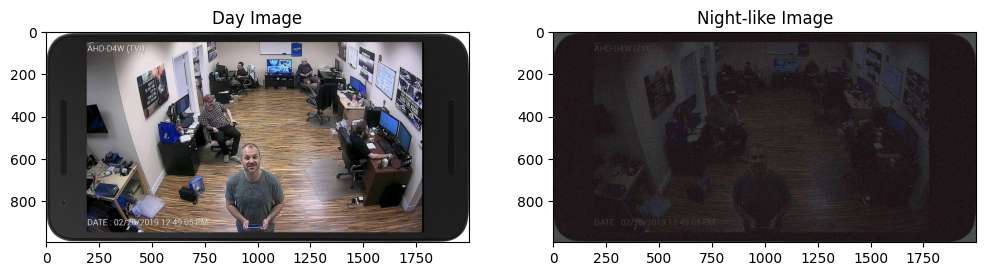

In [10]:

# Example usage:
if __name__ == "__main__":
    from PIL import Image
    import matplotlib.pyplot as plt

    img_path = "assets/image.png"
    day_img = Image.open(img_path).convert("RGB")

    night_img, degradation_params = augment_d2n(day_img, device="cuda")
    plt.figure(figsize=(12, 6))  # Width=12 inches, Height=6 inches
    print("Degradation parameters:", degradation_params)
    plt.subplot(1, 2, 1)
    plt.title("Day Image")
    plt.imshow(day_img)

    plt.subplot(1, 2, 2)
    plt.title("Night-like Image")
    plt.imshow(night_img.permute(1, 2, 0).cpu().numpy())
    plt.show()
